### Manual trader round 2: Container selection.

In [79]:
import numpy as np

In [80]:
base = [1,6,3,1,2,10,4,2,4,8]
recompensas = [10,80,37,17,31,90,50,20,73,89]

$$Atractivo[contenedor]  = \frac{Recompensa[contenedor]}{Nº Bots[contenedor]}$$

$$p[contenedor]  = Atractivo[contenedor]/\sum{j}Atractivo[j]$$

$$Profit = \frac{Recompensa[contenedor]}{Nº Bots[contenedor]+ 100\cdot p[contenedor]}$$

In [81]:
def profit(base,recompensas):
    profit = []
    probabilidad = []
    atractivo = []
    for i in range(len(base)):
        atractivo.append(recompensas[i]/base[i])
    for i in range(len(base)):
        probabilidad.append(atractivo[i]/sum(atractivo))
        profit.append(recompensas[i]/(base[i]+2*0.8*100*probabilidad[i]))
    return profit,probabilidad

In [82]:
profit,probability = profit(base,recompensas)
profit

[0.7463190110128443,
 3.550485798630019,
 2.0227180455773066,
 0.769981134007049,
 1.4609824390540826,
 4.253471692354647,
 2.5642511757302775,
 1.3889760954388481,
 2.7414391036523256,
 4.083693848524357]

Observamos que dependiendo del número de jugadas medio que supongamos, la jugada más rentable varía entre los multiplicadores 89 y 90. Por este motivo, vamos a ver en qué punto se cortan:

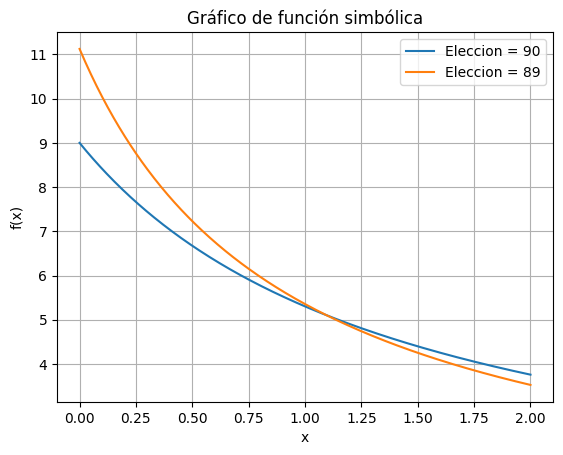

In [83]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir símbolo
x = sp.Symbol('x')

# Definir función simbólica
f_1 = recompensas[5]/(base[5]+100*x*probability[5])
f_2 = recompensas[9]/(base[9]+100*x*probability[9])
# Convertir a función numérica
f_num_1 = sp.lambdify(x, f_1, modules=['numpy'])
f_num_2 = sp.lambdify(x, f_2, modules=['numpy'])

# Rango de valores
x_vals = np.linspace(0, 2, 400)
y_vals_1 = f_num_1(x_vals)
y_vals_2 = f_num_2(x_vals)

# Graficar
plt.plot(x_vals, y_vals_1, label='Eleccion = 90')
plt.plot(x_vals, y_vals_2, label='Eleccion = 89')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de función simbólica')
plt.grid(True)
plt.legend()
plt.show()


Se cortan cuando se hacen 1.12 jugadas, que estimamos que será ampliamente superado, y por tanto nos decantamos por la opción del multiplicador x90.